In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
df_train.shape

(7352, 563)

In [5]:
df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [6]:
df_test.shape

(2947, 563)

In [7]:
df_train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [10]:
print("total duplicates in train data: {} \n".format(sum(df_train.duplicated())))
print("total duplicates in test data: {} \n".format(sum(df_test.duplicated())))


total duplicates in train data: 0 

total duplicates in test data: 0 



In [12]:
print("total null values in train data: {} \n".format(df_train.isnull().values.sum()))
print("total null values in test data: {} \n".format(df_test.isnull().values.sum()))

total null values in train data: 0 

total null values in test data: 0 



In [13]:
#check if the dataset in unbalanced
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:title={'center':'subjects'}, xlabel='subject', ylabel='count'>

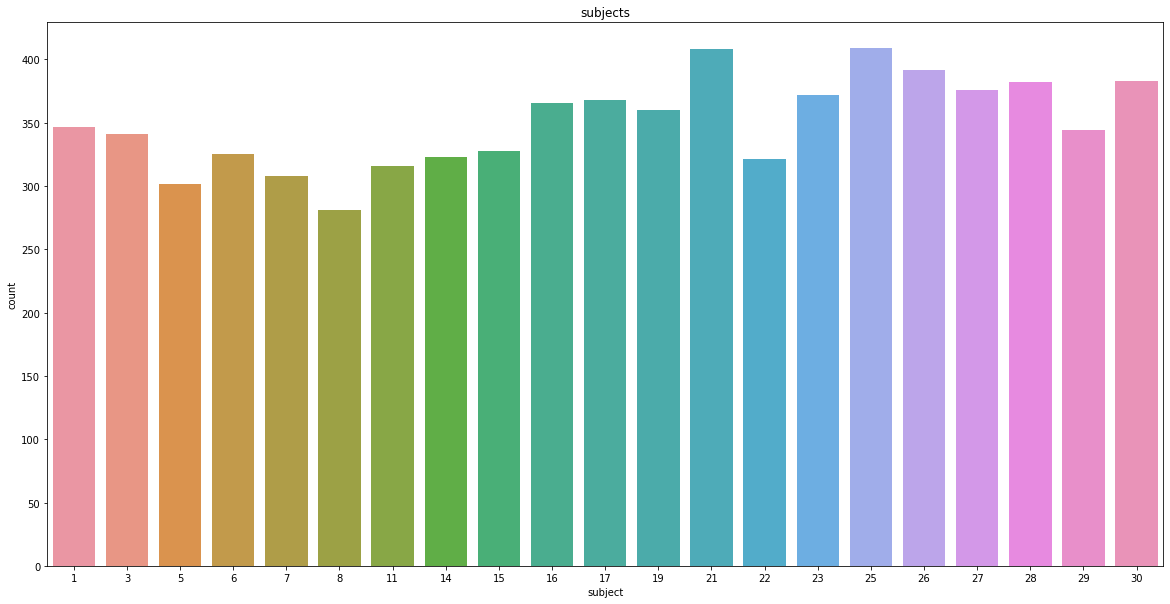

In [14]:
plt.figure(figsize = (20,10))
plt.title('subjects')
sns.countplot(x = 'subject', data = df_train)

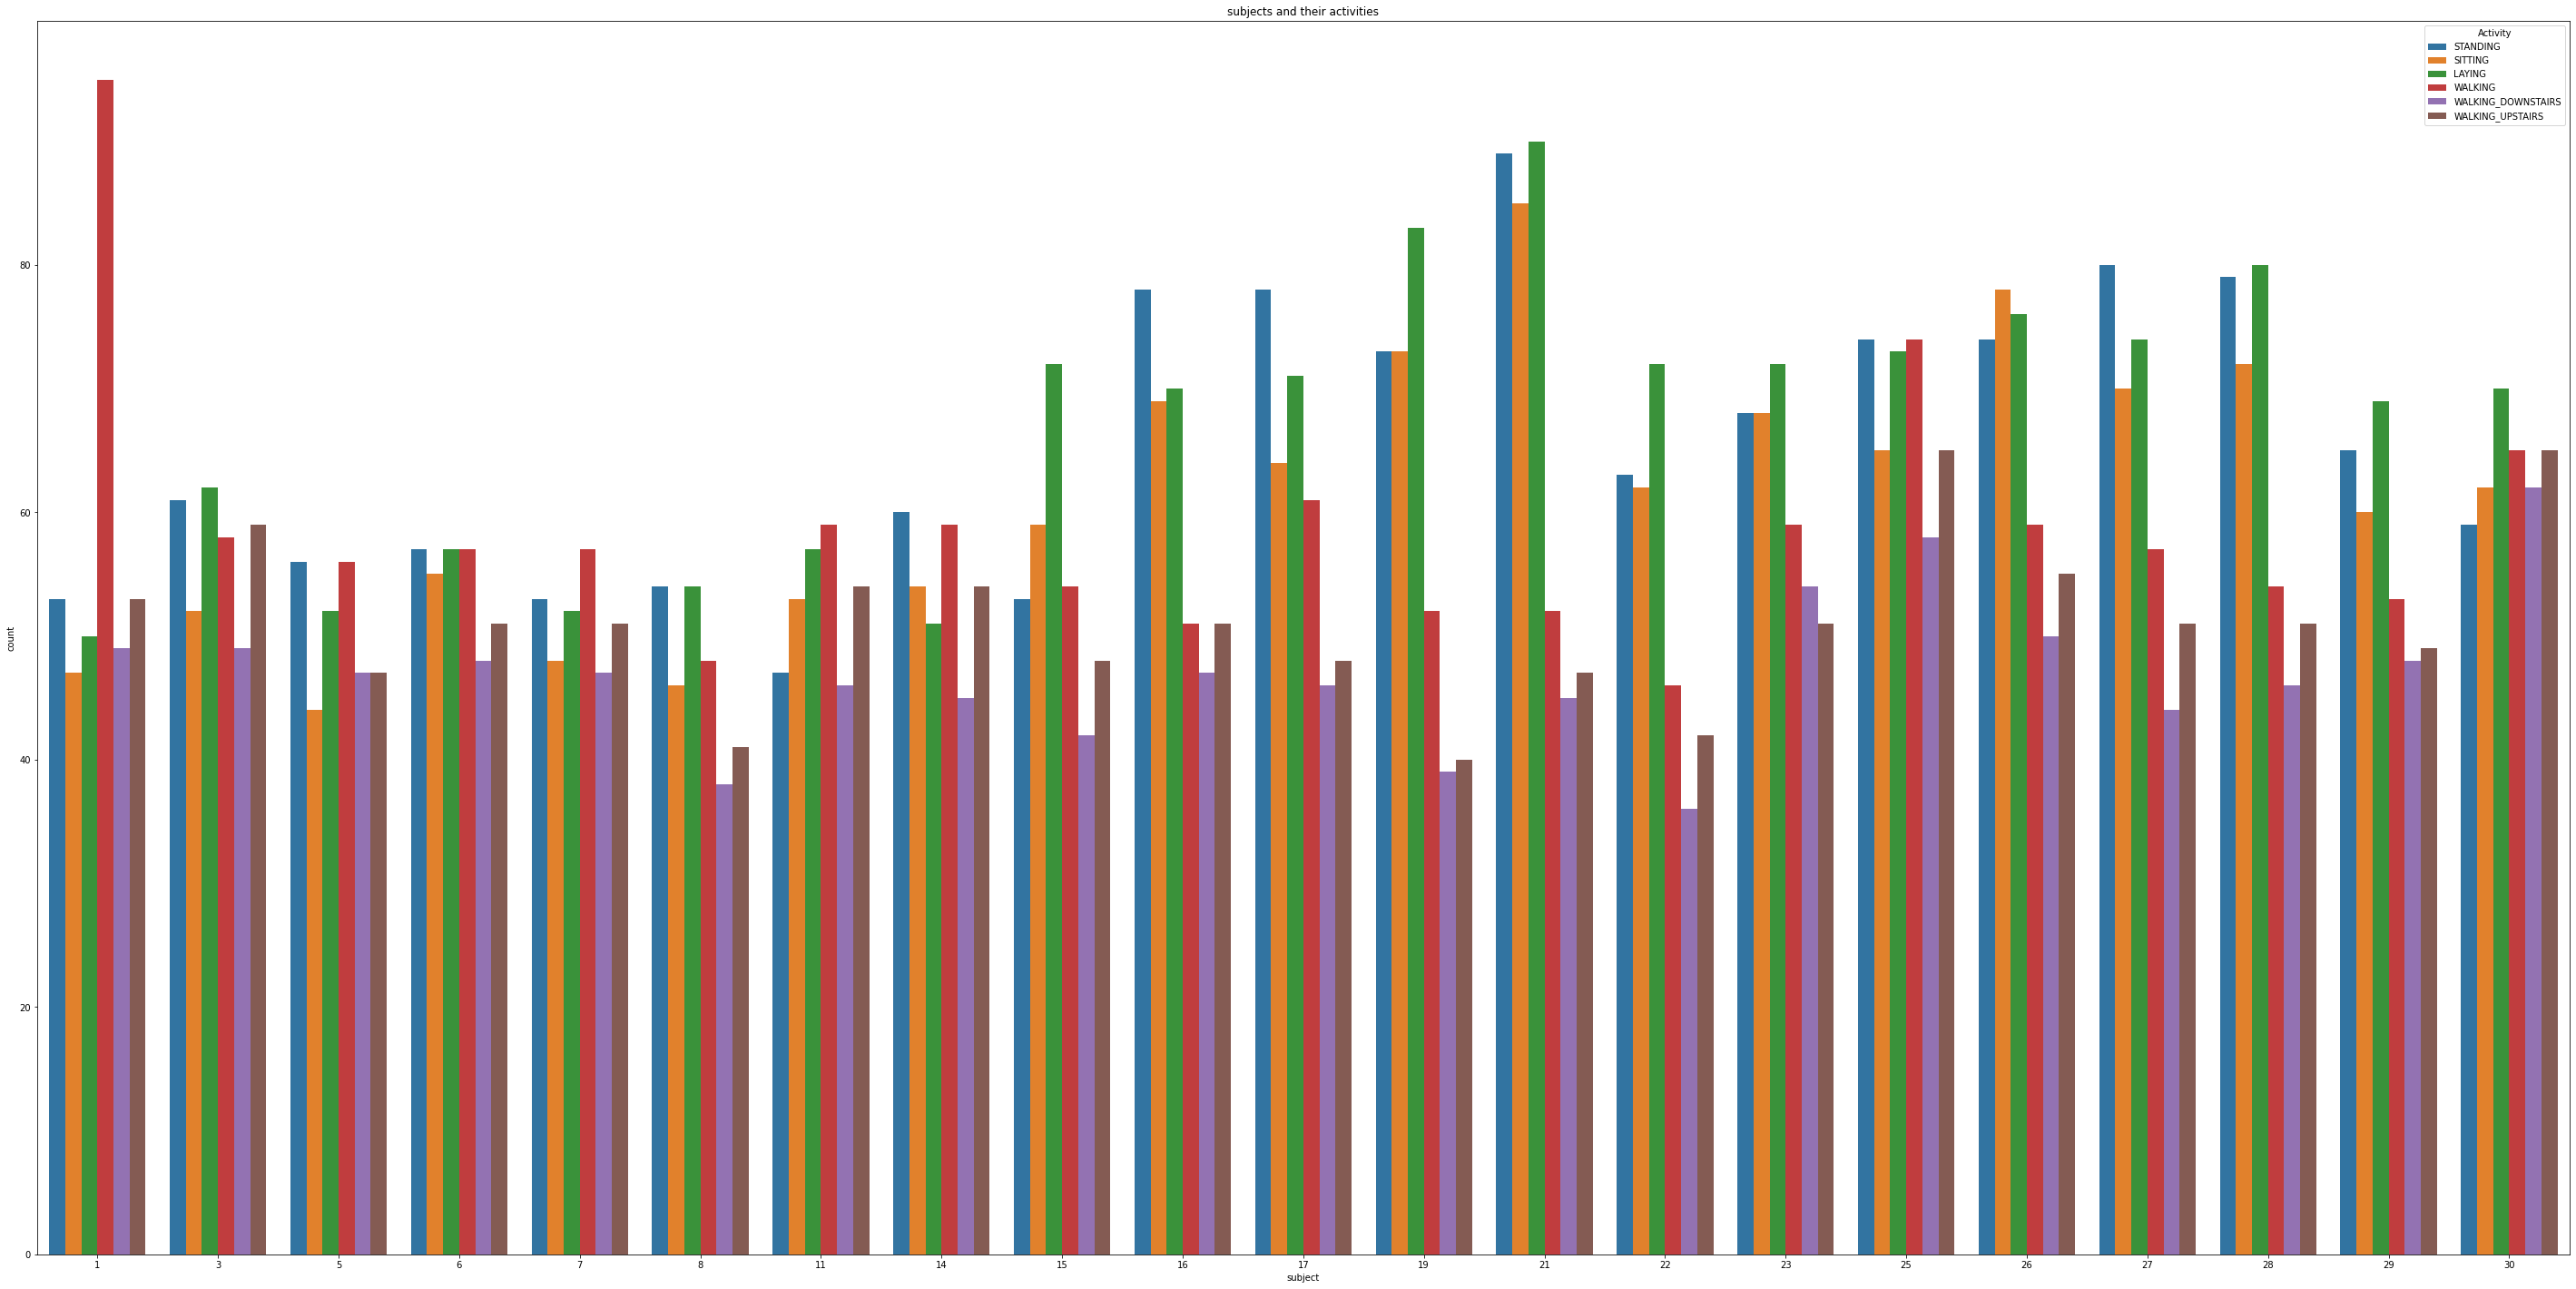

In [16]:
plt.figure(figsize = (50,25))
plt.title('subjects and their activities')
sns.countplot(x = 'subject', data = df_train, hue = 'Activity')
plt.show()

In [17]:
#ploting t-SNE
from sklearn.manifold import TSNE

In [18]:
X_for_tsne = df_train.drop(['subject', 'Activity'], axis = 1)

In [24]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, random_state=42, n_iter=1000).fit_transform(X_for_tsne)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.030s...
[t-SNE] Computed neighbors for 7352 samples in 0.824s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.125526
[t-SNE] KL divergence after 1000 iterations: 1.280823


<AxesSubplot:>

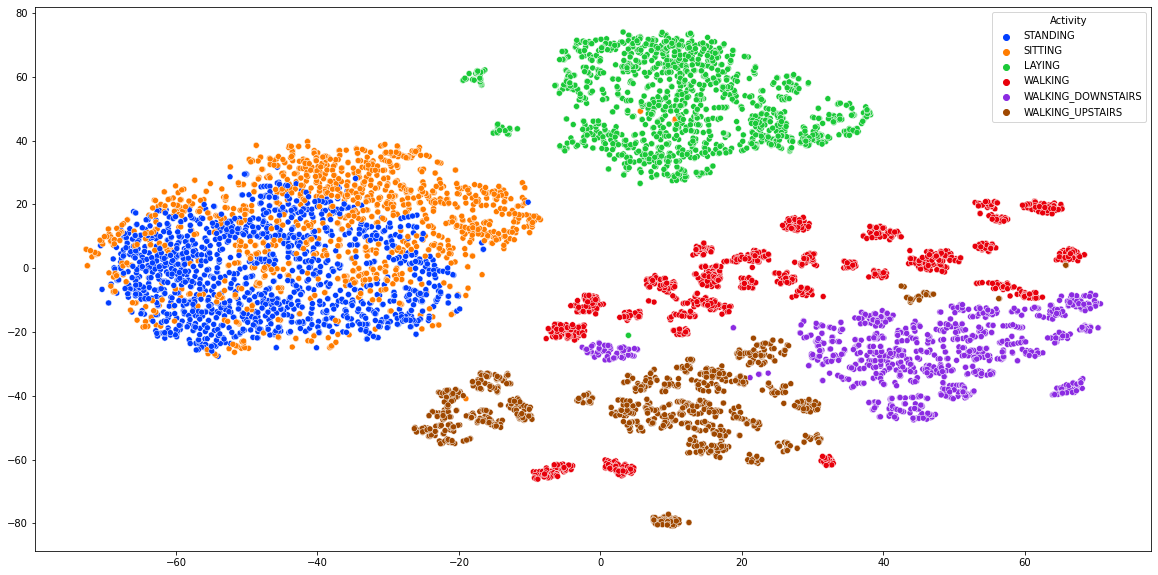

In [26]:
plt.figure(figsize= (20,10))
sns.scatterplot(x=tsne[:,0], y=tsne[:,1], hue=df_train['Activity'], palette='bright')

In [27]:
#classification
x_train = df_train.drop(['subject', 'Activity'], axis=1)
y_train = df_train.Activity

x_test = df_test.drop(['subject', 'Activity'], axis=1)
y_test = df_test.Activity


In [28]:
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.model_selection import RandomizedSearchCV

In [30]:
params = {
    'n_estimators':np.arange(20,101,10),
    'max_depth': np.arange(2,16,2)
}
classifier = rf()
rf_classifier = RandomizedSearchCV(classifier, param_distributions=params, cv=10, random_state=42)
rf_classifier.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [31]:
#evaluation
y_predict = rf_classifier.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print('accuracy:', accuracy)

accuracy: 0.9263657957244655
